# Playing with Classifiers

## Integration test with Genetic Search
This section of notebook tests checks that classifiers can be used with Genetic Search. It is essentially the pipe example for segmentors, but using classifiers.

In [1]:
from see.classifiers import Classifier
from see.classifier_fitness import ClassifierFitness
from see.Workflow import workflow


# Initialize Algorithm Space and Workflow
algorithm_space = Classifier.algorithmspace

workflow.addalgos([Classifier, ClassifierFitness])
wf = workflow()
print(wf)

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5
	length_scale = 1.0



## Toy Dataset
The goal of this section is to recreate the **toy example** provided by the Sklearn tutorial at this [link](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).
We assume that the toy example used manually tuned classifiers to attain reasonably good fitness scores.
We will use genetic search to find tuned classifiers that have a **similar fitness scores** for the
same data sets.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from see.base_classes import pipedata
from see.classifier_helpers import helpers
import numpy as np

# Create Data: Sklearn tutorial toy datasets
## Moons
moons_ds = pipedata()
moons_ds.name = 'Moons Dataset'
moons_ds.X, moons_ds.y = make_moons(noise=0.3, random_state=0)

## Circles
circles_ds = pipedata()
circles_ds.name = 'Circles Dataset'
circles_ds.X, circles_ds.y = make_circles(noise=0.2, factor=0.5, random_state=1)

## Linearly Seperable dataset
lin_ds = pipedata()
lin_ds.X, lin_ds.y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
lin_ds.name = 'Linearly Sepearble Dataset'
lin_ds.X += 2 * rng.uniform(size=lin_ds.X.shape)

datasets = [moons_ds, circles_ds, lin_ds]
validation_sets = []

# Preprocess data
for ds in datasets:
    ds.X = StandardScaler().fit_transform(ds.X)
    
# Split datasets into training, testing, and validation sets
for i, ds in enumerate(datasets):
    temp = helpers.generate_train_test_set(ds.X, ds.y)
    validation_sets.append(temp.testing_set)
    datasets[i] = helpers.generate_train_test_set(temp.training_set.X, temp.training_set.y)
    datasets[i].name = ds.name

In [14]:
%%time
from see import GeneticSearch
num_generations = 20
hof_per_dataset = []

for ds in datasets:
    print('Running ', ds.name)
    my_evolver = GeneticSearch.Evolver(workflow, ds, pop_size=20)
    my_evolver.run(ngen=num_generations)
    hof_per_dataset.append(my_evolver.hof) # Store the best solution found for each dataset

Running  Moons Dataset
Initializing a new random population
Generation 0/20 of population size 20
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 77
	alpha = 0.054
	max_depth = 4
	n_estimators = 8
	n_neighbors = 1
	length_scale = 0.1

Time: 0.173 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 9
	alpha = 0.279
	max_depth = 8
	n_estimators = 9
	n_neighbors = 4
	length_scale = 0.7

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 84
	alpha = 0.221
	max_depth = 8
	n_estimators = 8
	n_neighbors = 3
	length_scale = 0.2

Time: 0.014 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 50
	alpha = 0.53
	max_depth = 1
	n_estimators = 6
	n_neighbors = 3
	length_scale = 0.6



/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Time: 0.161 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 18
	alpha = 0.427
	max_depth = 7
	n_estimators = 5
	n_neighbors = 3
	length_scale = 0.6

Time: 0.054 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 68
	alpha = 0.758
	max_depth = 9
	n_estimators = 1
	n_neighbors = 5
	length_scale = 0.6

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 29
	alpha = 0.04
	max_depth = 2
	n_estimators = 3
	n_neighbors = 4
	length_scale = 0.4

Time: 0.176 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 44
	alpha = 0.138
	max_depth = 1
	n_estimators = 2
	n_neighbors = 8
	length_scale = 0.5

Time: 0.047 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision 

Time: 0.195 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 75
	alpha = 0.924
	max_depth = 7
	n_estimators = 4
	n_neighbors = 1
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.001 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 68
	alpha = 0.04
	max_depth = 2
	n_estimators = 1
	n_neighbors = 4
	length_scale = 0.6

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 29
	alpha = 0.758
	max_depth = 9
	n_estimators = 3
	n_neighbors = 5
	length_scale = 0.4

Time: 0.128 s
fitness=0.125

#BEST [0.0,  ['K Nearest Neighbors', 67, 0.303, 7, 5, 3, 0.6]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using 

Time: 0.152 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 58
	alpha = 0.562
	max_depth = 3
	n_estimators = 4
	n_neighbors = 3
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.004 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 47
	alpha = 0.351
	max_depth = 3
	n_estimators = 8
	n_neighbors = 5
	length_scale = 0.3

RUNNING EVAL FOR KNN
Time: 0.006 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 47
	alpha = 0.631
	max_depth = 2
	n_estimators = 1
	n_neighbors = 2
	length_scale = 0.6

Time: 0.129 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 19
	alpha = 0.96
	max_depth = 3
	n_estimators = 7
	n_neighbors = 4
	length_scale = 0.1

Time: 0.002 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	a

Time: 0.052 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 18
	alpha = 0.138
	max_depth = 1
	n_estimators = 2
	n_neighbors = 8
	length_scale = 0.5

Time: 0.046 s
fitness=0.041666666666666664

#BEST [0.0,  ['K Nearest Neighbors', 67, 0.303, 7, 9, 3, 0.6]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Generation 5/20 of population size 20
<class 'see.Workflow.workflow'> par

Time: 0.161 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 55
	alpha = 0.269
	max_depth = 5
	n_estimators = 2
	n_neighbors = 7
	length_scale = 0.9

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 49
	alpha = 0.626
	max_depth = 5
	n_estimators = 2
	n_neighbors = 4
	length_scale = 0.8

Time: 0.149 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 43
	alpha = 0.095
	max_depth = 3
	n_estimators = 5
	n_neighbors = 2
	length_scale = 0.1

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 70
	alpha = 0.288
	max_depth = 4
	n_estimators = 7
	n_neighbors = 5
	length_scale = 0.2

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.041666666666666664

<clas

Time: 0.051 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 12
	alpha = 0.411
	max_depth = 6
	n_estimators = 3
	n_neighbors = 7
	length_scale = 0.6

Time: 0.052 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 11
	alpha = 0.572
	max_depth = 4
	n_estimators = 7
	n_neighbors = 5
	length_scale = 0.6

Time: 0.049 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 44
	alpha = 0.242
	max_depth = 7
	n_estimators = 1
	n_neighbors = 5
	length_scale = 0.6

Time: 0.135 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 51
	alpha = 0.685
	max_depth = 4
	n_estimators = 9
	n_neighbors = 5
	length_scale = 0.9

Time: 0.038 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Ba

Time: 0.046 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 73
	alpha = 0.477
	max_depth = 5
	n_estimators = 8
	n_neighbors = 6
	length_scale = 0.8

Time: 0.154 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 34
	alpha = 0.541
	max_depth = 5
	n_estimators = 8
	n_neighbors = 3
	length_scale = 0.5

Time: 0.047 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 90
	alpha = 0.019
	max_depth = 9
	n_estimators = 3
	n_neighbors = 4
	length_scale = 0.3

Time: 0.009 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 24
	alpha = 0.215
	max_depth = 9
	n_estimators = 6
	n_neighbors = 4
	length_scale = 0.5

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm

Time: 0.005 s
fitness=0.0

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 67
	alpha = 0.303
	max_depth = 7
	n_estimators = 9
	n_neighbors = 3
	length_scale = 0.6

RUNNING EVAL FOR KNN
Time: 0.008 s
fitness=0.0

#BEST [0.0,  ['K Nearest Neighbors', 23, 0.303, 7, 9, 3, 0.6]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Generation 12/20 of population size 20
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 46
	alpha = 0

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


Time: 0.164 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 26
	alpha = 0.232
	max_depth = 8
	n_estimators = 2
	n_neighbors = 9
	length_scale = 0.3

Time: 0.15 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 19
	alpha = 0.592
	max_depth = 5
	n_estimators = 2
	n_neighbors = 6
	length_scale = 0.6

Time: 0.006 s
fitness=0.4583333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 58
	alpha = 0.116
	max_depth = 7
	n_estimators = 6
	n_neighbors = 1
	length_scale = 0.6

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 52
	alpha = 0.059
	max_depth = 4
	n_estimators = 8
	n_neighbors = 9
	length_scale = 0.9

Time: 0.015 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Ne

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specif

Time: 0.144 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 38
	alpha = 0.481
	max_depth = 5
	n_estimators = 3
	n_neighbors = 9
	length_scale = 0.8

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 70
	alpha = 0.241
	max_depth = 3
	n_estimators = 2
	n_neighbors = 9
	length_scale = 0.7

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 23
	alpha = 0.303
	max_depth = 7
	n_estimators = 9
	n_neighbors = 3
	length_scale = 0.6

RUNNING EVAL FOR KNN
Time: 0.003 s
fitness=0.0

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 67
	alpha = 0.895
	max_depth = 5
	n_estimators = 5
	n_neighbors = 3
	length_scale = 0.3

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.0

<class 'see.Wor

Time: 0.164 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 73
	alpha = 0.435
	max_depth = 2
	n_estimators = 8
	n_neighbors = 5
	length_scale = 0.4

Time: 0.144 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 39
	alpha = 0.035
	max_depth = 1
	n_estimators = 8
	n_neighbors = 7
	length_scale = 0.8

Time: 0.158 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 100
	alpha = 0.026
	max_depth = 3
	n_estimators = 1
	n_neighbors = 8
	length_scale = 0.7

Time: 0.003 s
fitness=0.3333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 10
	alpha = 0.946
	max_depth = 3
	n_estimators = 8
	n_neighbors = 6
	length_scale = 0.1

Time: 0.144 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 87
	alpha = 0.3

Time: 0.146 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 94
	alpha = 0.462
	max_depth = 6
	n_estimators = 3
	n_neighbors = 3
	length_scale = 0.8

RUNNING EVAL FOR KNN
Time: 0.003 s
fitness=0.0

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 23
	alpha = 0.303
	max_depth = 7
	n_estimators = 9
	n_neighbors = 3
	length_scale = 0.6

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.0

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 67
	alpha = 0.895
	max_depth = 5
	n_estimators = 5
	n_neighbors = 3
	length_scale = 0.3

RUNNING EVAL FOR KNN
Time: 0.003 s
fitness=0.0

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 67
	alpha = 0.303
	max_depth = 7
	n_estimators = 5
	n_neighbors = 3
	length_scale = 0.6

RUNNING EVAL FOR KNN
Time: 0.003 s
fitness=0.0

<class 'see.Workflow.workflow'> parameters: 
	alg

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


Time: 0.164 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 34
	alpha = 0.099
	max_depth = 3
	n_estimators = 9
	n_neighbors = 1
	length_scale = 0.5

Time: 0.145 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 29
	alpha = 0.712
	max_depth = 9
	n_estimators = 1
	n_neighbors = 2
	length_scale = 0.2

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 63
	alpha = 0.52
	max_depth = 4
	n_estimators = 1
	n_neighbors = 3
	length_scale = 0.1

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.0

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 75
	alpha = 0.441
	max_depth = 8
	n_estimators = 6
	n_neighbors = 6
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.001 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> para

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of

using workflow mutate algorithm and looping over workflow
Running  Circles Dataset
Initializing a new random population
Generation 0/20 of population size 20
<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 91
	alpha = 0.096
	max_depth = 2
	n_estimators = 4
	n_neighbors = 9
	length_scale = 0.4

Time: 0.004 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 95
	alpha = 0.398
	max_depth = 7
	n_estimators = 3
	n_neighbors = 9
	length_scale = 0.7

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 70
	alpha = 0.347
	max_depth = 9
	n_estimators = 7
	n_neighbors = 4
	length_scale = 0.5

Time: 0.001 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 28
	alpha = 0.774
	max_depth = 7
	n_estimators = 5
	n_neighbors = 1
	length_scale = 0.6

Time: 0.

Time: 0.251 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 32
	alpha = 0.716
	max_depth = 6
	n_estimators = 2
	n_neighbors = 6
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 88
	alpha = 0.07
	max_depth = 3
	n_estimators = 1
	n_neighbors = 6
	length_scale = 0.9

Time: 0.229 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 32
	alpha = 0.716
	max_depth = 6
	n_estimators = 2
	n_neighbors = 6
	length_scale = 0.1

Time: 0.21 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 88
	alpha = 0.07
	max_depth = 3
	n_estimators = 1
	n_neighbors = 6
	length_scale = 0.9

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'

Time: 0.248 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 11
	alpha = 0.495
	max_depth = 5
	n_estimators = 2
	n_neighbors = 6
	length_scale = 0.2

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 88
	alpha = 0.07
	max_depth = 3
	n_estimators = 1
	n_neighbors = 7
	length_scale = 0.9

Time: 0.004 s
fitness=0.5416666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 76
	alpha = 0.059
	max_depth = 2
	n_estimators = 3
	n_neighbors = 6
	length_scale = 0.2

Time: 0.206 s
fitness=0.08333333333333333

#BEST [0.08333333333333333,  ['Gaussian Naive Bayes', 44, 0.094, 9, 1, 1, 0.5]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
usin

Time: 0.221 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 44
	alpha = 0.112
	max_depth = 8
	n_estimators = 7
	n_neighbors = 7
	length_scale = 0.9

Time: 0.248 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 61
	alpha = 0.566
	max_depth = 1
	n_estimators = 2
	n_neighbors = 8
	length_scale = 0.9

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 87
	alpha = 0.959
	max_depth = 3
	n_estimators = 4
	n_neighbors = 9
	length_scale = 0.7

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.375

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 68
	alpha = 0.021
	max_depth = 9
	n_estimators = 9
	n_neighbors = 1
	length_scale = 0.6

Time: 0.033 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 

RUNNING EVAL FOR GNB
Time: 0.004 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 8
	alpha = 0.592
	max_depth = 9
	n_estimators = 8
	n_neighbors = 7
	length_scale = 0.5

RUNNING EVAL FOR GNB
Time: 0.005 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 44
	alpha = 0.094
	max_depth = 9
	n_estimators = 1
	n_neighbors = 1
	length_scale = 0.9

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 90
	alpha = 0.076
	max_depth = 9
	n_estimators = 9
	n_neighbors = 2
	length_scale = 0.2

Time: 0.267 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 54
	alpha = 0.683
	max_depth = 6
	n_estimators = 7
	n_neighbors = 3
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.083

Time: 0.246 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 1
	alpha = 0.466
	max_depth = 5
	n_estimators = 2
	n_neighbors = 5
	length_scale = 0.8

Time: 0.006 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 53
	alpha = 0.353
	max_depth = 7
	n_estimators = 3
	n_neighbors = 9
	length_scale = 0.4

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.375

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 8
	alpha = 0.424
	max_depth = 2
	n_estimators = 4
	n_neighbors = 7
	length_scale = 0.5

Time: 0.002 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 86
	alpha = 0.203
	max_depth = 9
	n_estimators = 4
	n_neighbors = 7
	length_scale = 0.9

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorith

Time: 0.241 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 54
	alpha = 0.683
	max_depth = 6
	n_estimators = 7
	n_neighbors = 3
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 11
	alpha = 0.716
	max_depth = 5
	n_estimators = 2
	n_neighbors = 4
	length_scale = 0.2

Time: 0.266 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 32
	alpha = 0.495
	max_depth = 6
	n_estimators = 2
	n_neighbors = 6
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 76
	alpha = 0.059
	max_depth = 2
	n_estimators = 1
	n_neighbors = 7
	length_scale = 0.2

Time: 0.265 s
fitness=0.08333333333333333

<class 'see.Workflow.workfl

Time: 0.218 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 90
	alpha = 0.076
	max_depth = 6
	n_estimators = 7
	n_neighbors = 2
	length_scale = 0.2

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 32
	alpha = 0.495
	max_depth = 5
	n_estimators = 2
	n_neighbors = 4
	length_scale = 0.2

Time: 0.22 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 11
	alpha = 0.716
	max_depth = 6
	n_estimators = 2
	n_neighbors = 6
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 76
	alpha = 0.059
	max_depth = 2
	n_estimators = 3
	n_neighbors = 7
	length_scale = 0.2

Time: 0.188 s
fitness=0.08333333333333333

<class 'see.Workflow.workflo

Time: 0.234 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 86
	alpha = 0.89
	max_depth = 1
	n_estimators = 5
	n_neighbors = 4
	length_scale = 0.4

Time: 0.009 s
fitness=0.4583333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 98
	alpha = 0.251
	max_depth = 8
	n_estimators = 3
	n_neighbors = 6
	length_scale = 0.7

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 49
	alpha = 0.621
	max_depth = 7
	n_estimators = 8
	n_neighbors = 7
	length_scale = 0.7

Time: 0.001 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 80
	alpha = 0.939
	max_depth = 4
	n_estimators = 4
	n_neighbors = 1
	length_scale = 0.5

Time: 0.248 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network


Time: 0.226 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 54
	alpha = 0.683
	max_depth = 6
	n_estimators = 7
	n_neighbors = 3
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 32
	alpha = 0.716
	max_depth = 6
	n_estimators = 2
	n_neighbors = 4
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 11
	alpha = 0.495
	max_depth = 5
	n_estimators = 2
	n_neighbors = 6
	length_scale = 0.2

Time: 0.222 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 88
	alpha = 0.059
	max_depth = 2
	n_estimators = 3
	n_neighbors = 6
	length_scale = 0.2

Time: 0.257 s
fitness=0.08333333333333333

<class 'see.Workflow.workfl

Time: 0.235 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 5
	alpha = 0.49
	max_depth = 5
	n_estimators = 4
	n_neighbors = 7
	length_scale = 0.5

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.2916666666666667

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 60
	alpha = 0.222
	max_depth = 5
	n_estimators = 8
	n_neighbors = 2
	length_scale = 0.5

Time: 0.037 s
fitness=0.20833333333333334

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 44
	alpha = 0.094
	max_depth = 9
	n_estimators = 1
	n_neighbors = 1
	length_scale = 0.5

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 8
	alpha = 0.592
	max_depth = 9
	n_estimators = 8
	n_neighbors = 7
	length_scale = 0.9

RUNNING EVAL FOR GNB
Time: 0.004 s
fitness=0.08333333333333333

<class 'see

Time: 0.221 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 54
	alpha = 0.683
	max_depth = 6
	n_estimators = 7
	n_neighbors = 3
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 11
	alpha = 0.495
	max_depth = 5
	n_estimators = 2
	n_neighbors = 4
	length_scale = 0.1

Time: 0.233 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 32
	alpha = 0.716
	max_depth = 6
	n_estimators = 2
	n_neighbors = 6
	length_scale = 0.2

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 88
	alpha = 0.07
	max_depth = 3
	n_estimators = 1
	n_neighbors = 6
	length_scale = 0.9

Time: 0.216 s
fitness=0.08333333333333333

<class 'see.Workflow.workflo

Time: 0.29 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 97
	alpha = 0.77
	max_depth = 9
	n_estimators = 4
	n_neighbors = 2
	length_scale = 0.8

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 95
	alpha = 0.538
	max_depth = 5
	n_estimators = 2
	n_neighbors = 1
	length_scale = 0.8

Time: 0.002 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 8
	alpha = 0.673
	max_depth = 7
	n_estimators = 1
	n_neighbors = 6
	length_scale = 0.3

Time: 0.004 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 29
	alpha = 0.955
	max_depth = 5
	n_estimators = 7
	n_neighbors = 6
	length_scale = 0.1

Time: 0.018 s
fitness=0.2916666666666667

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 39
	alpha = 0.027
	max_depth = 

Time: 0.206 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 11
	alpha = 0.495
	max_depth = 5
	n_estimators = 2
	n_neighbors = 4
	length_scale = 0.2

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 32
	alpha = 0.716
	max_depth = 6
	n_estimators = 2
	n_neighbors = 6
	length_scale = 0.1

Time: 0.253 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 88
	alpha = 0.07
	max_depth = 3
	n_estimators = 1
	n_neighbors = 6
	length_scale = 0.9

Time: 0.244 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 76
	alpha = 0.059
	max_depth = 2
	n_estimators = 3
	n_neighbors = 7
	length_scale = 0.2

Time: 0.007 s
fitness=0.16666666666666666

#BEST [0.08333333333333333,  ['Gaussian Naive Bayes', 44

/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/davin/Documents/GitHub/see-segment/see-clasify/envs/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Time: 0.199 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 61
	alpha = 0.582
	max_depth = 4
	n_estimators = 7
	n_neighbors = 9
	length_scale = 0.6

Time: 0.051 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 50
	alpha = 0.166
	max_depth = 4
	n_estimators = 6
	n_neighbors = 5
	length_scale = 0.6

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 49
	alpha = 0.321
	max_depth = 1
	n_estimators = 7
	n_neighbors = 6
	length_scale = 0.9

Time: 0.014 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 74
	alpha = 0.619
	max_depth = 1
	n_estimators = 7
	n_neighbors = 2
	length_scale = 0.5

RUNNING EVAL FOR KNN
Time: 0.003 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	al

Time: 0.184 s
fitness=0.08333333333333333

#BEST [0.041666666666666664,  ['Gaussian Process', 61, 0.341, 4, 7, 9, 0.6]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
Generation 2/20 of population size 20
<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 63
	alpha = 0.031
	max_depth = 8
	n_estimators = 7
	n_neighbors = 2
	length_scale = 0.2

Time: 0.188 s
fitness=0.08333333333333333

<class 'see.Workflow.

Time: 0.197 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 71
	alpha = 0.59
	max_depth = 8
	n_estimators = 7
	n_neighbors = 6
	length_scale = 0.3

Time: 0.193 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 93
	alpha = 0.428
	max_depth = 4
	n_estimators = 6
	n_neighbors = 5
	length_scale = 0.7

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 64
	alpha = 0.32
	max_depth = 9
	n_estimators = 8
	n_neighbors = 3
	length_scale = 0.8

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 9
	alpha = 0.336
	max_depth = 8
	n_estimators = 1
	n_neighbors = 4
	length_scale = 0.3

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.16666666666666666

<class '

Time: 0.055 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 60
	alpha = 0.216
	max_depth = 6
	n_estimators = 6
	n_neighbors = 5
	length_scale = 0.4

Time: 0.041 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 53
	alpha = 0.582
	max_depth = 1
	n_estimators = 4
	n_neighbors = 6
	length_scale = 0.4

Time: 0.042 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 69
	alpha = 0.02
	max_depth = 7
	n_estimators = 5
	n_neighbors = 4
	length_scale = 0.4

Time: 0.053 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 65
	alpha = 0.077
	max_depth = 2
	n_estimators = 4
	n_neighbors = 9
	length_scale = 0.1

Time: 0.049 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	m

Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 83
	alpha = 0.396
	max_depth = 2
	n_estimators = 3
	n_neighbors = 7
	length_scale = 0.6

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 72
	alpha = 0.152
	max_depth = 7
	n_estimators = 1
	n_neighbors = 8
	length_scale = 0.2

Time: 0.202 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 45
	alpha = 0.863
	max_depth = 2
	n_estimators = 3
	n_neighbors = 1
	length_scale = 0.8

Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 66
	alpha = 0.925
	max_depth = 1
	n_estimators = 5
	n_neighbors = 7
	length_scale = 0.1

Time: 0.051 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm =

Time: 0.052 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 60
	alpha = 0.216
	max_depth = 1
	n_estimators = 6
	n_neighbors = 6
	length_scale = 0.4

Time: 0.045 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 53
	alpha = 0.582
	max_depth = 6
	n_estimators = 4
	n_neighbors = 5
	length_scale = 0.4

Time: 0.051 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 69
	alpha = 0.02
	max_depth = 7
	n_estimators = 5
	n_neighbors = 4
	length_scale = 0.4

Time: 0.049 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 65
	alpha = 0.077
	max_depth = 2
	n_estimators = 4
	n_neighbors = 9
	length_scale = 0.1

Time: 0.055 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	m

Time: 0.192 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 34
	alpha = 0.642
	max_depth = 9
	n_estimators = 7
	n_neighbors = 1
	length_scale = 0.3

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 28
	alpha = 0.015
	max_depth = 4
	n_estimators = 3
	n_neighbors = 5
	length_scale = 0.9

Time: 0.007 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 69
	alpha = 0.411
	max_depth = 6
	n_estimators = 4
	n_neighbors = 6
	length_scale = 0.4

Time: 0.002 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 78
	alpha = 0.256
	max_depth = 9
	n_estimators = 6
	n_neighbors = 5
	length_scale = 0.2

Time: 0.013 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 81


Time: 0.052 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 61
	alpha = 0.341
	max_depth = 4
	n_estimators = 7
	n_neighbors = 9
	length_scale = 0.6

Time: 0.052 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 53
	alpha = 0.216
	max_depth = 1
	n_estimators = 6
	n_neighbors = 5
	length_scale = 0.4

Time: 0.04 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 60
	alpha = 0.582
	max_depth = 6
	n_estimators = 4
	n_neighbors = 6
	length_scale = 0.4

Time: 0.041 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 69
	alpha = 0.02
	max_depth = 7
	n_estimators = 5
	n_neighbors = 4
	length_scale = 0.4

Time: 0.043 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	ma

Time: 0.193 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 1
	alpha = 0.325
	max_depth = 9
	n_estimators = 2
	n_neighbors = 2
	length_scale = 0.1

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 56
	alpha = 0.272
	max_depth = 2
	n_estimators = 5
	n_neighbors = 3
	length_scale = 0.2

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 71
	alpha = 0.738
	max_depth = 1
	n_estimators = 7
	n_neighbors = 8
	length_scale = 0.6

Time: 0.05 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 57
	alpha = 0.993
	max_depth = 7
	n_estimators = 1
	n_neighbors = 2
	length_scale = 0.1

Time: 0.242 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'

Time: 0.051 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 60
	alpha = 0.216
	max_depth = 1
	n_estimators = 6
	n_neighbors = 6
	length_scale = 0.4

Time: 0.046 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 53
	alpha = 0.582
	max_depth = 6
	n_estimators = 4
	n_neighbors = 5
	length_scale = 0.4

Time: 0.042 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 65
	alpha = 0.077
	max_depth = 2
	n_estimators = 4
	n_neighbors = 4
	length_scale = 0.1

Time: 0.059 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 69
	alpha = 0.02
	max_depth = 7
	n_estimators = 5
	n_neighbors = 9
	length_scale = 0.4

Time: 0.041 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	m

Time: 0.214 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 12
	alpha = 0.53
	max_depth = 6
	n_estimators = 3
	n_neighbors = 5
	length_scale = 0.1

Time: 0.008 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 41
	alpha = 0.009
	max_depth = 7
	n_estimators = 1
	n_neighbors = 9
	length_scale = 0.4

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 95
	alpha = 0.488
	max_depth = 3
	n_estimators = 4
	n_neighbors = 8
	length_scale = 0.4

Time: 0.188 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 22
	alpha = 0.213
	max_depth = 8
	n_estimators = 5
	n_neighbors = 5
	length_scale = 0.9

RUNNING EVAL FOR KNN
Time: 0.006 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> pa

Time: 0.061 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 53
	alpha = 0.582
	max_depth = 6
	n_estimators = 4
	n_neighbors = 6
	length_scale = 0.4

Time: 0.043 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 60
	alpha = 0.216
	max_depth = 1
	n_estimators = 6
	n_neighbors = 5
	length_scale = 0.4

Time: 0.044 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 65
	alpha = 0.077
	max_depth = 2
	n_estimators = 4
	n_neighbors = 4
	length_scale = 0.1

Time: 0.048 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 69
	alpha = 0.02
	max_depth = 7
	n_estimators = 5
	n_neighbors = 9
	length_scale = 0.4

Time: 0.04 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	ma

Time: 0.202 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 45
	alpha = 0.029
	max_depth = 4
	n_estimators = 1
	n_neighbors = 1
	length_scale = 0.2

Time: 0.002 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 88
	alpha = 0.767
	max_depth = 9
	n_estimators = 7
	n_neighbors = 2
	length_scale = 0.5

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 88
	alpha = 0.312
	max_depth = 9
	n_estimators = 3
	n_neighbors = 6
	length_scale = 0.9

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.16666666666666666

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 74
	alpha = 0.413
	max_depth = 3
	n_estimators = 8
	n_neighbors = 4
	length_scale = 0.8

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.16666666666666666

<class 'see.Workflow.work

Time: 0.2 s
fitness=0.08333333333333333

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 61
	alpha = 0.929
	max_depth = 5
	n_estimators = 5
	n_neighbors = 3
	length_scale = 0.6

Time: 0.05 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 61
	alpha = 0.341
	max_depth = 4
	n_estimators = 7
	n_neighbors = 9
	length_scale = 0.6

Time: 0.049 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 61
	alpha = 0.929
	max_depth = 5
	n_estimators = 5
	n_neighbors = 3
	length_scale = 0.6

Time: 0.053 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_iter = 61
	alpha = 0.341
	max_depth = 4
	n_estimators = 7
	n_neighbors = 9
	length_scale = 0.6

Time: 0.049 s
fitness=0.041666666666666664

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Process
	max_

In [15]:
for hof in hof_per_dataset:
    print(hof)

[['K Nearest Neighbors', 23, 0.303, 7, 9, 3, 0.6], ['K Nearest Neighbors', 67, 0.895, 5, 5, 3, 0.3], ['K Nearest Neighbors', 23, 0.303, 7, 9, 3, 0.3], ['K Nearest Neighbors', 67, 0.895, 5, 5, 3, 0.6], ['K Nearest Neighbors', 67, 0.303, 7, 9, 3, 0.6], ['K Nearest Neighbors', 23, 0.895, 5, 5, 3, 0.3], ['K Nearest Neighbors', 67, 0.303, 5, 5, 3, 0.6], ['K Nearest Neighbors', 23, 0.895, 7, 9, 3, 0.3], ['K Nearest Neighbors', 23, 0.895, 5, 9, 3, 0.3], ['K Nearest Neighbors', 67, 0.303, 7, 5, 3, 0.6]]
[['Gaussian Naive Bayes', 44, 0.094, 9, 1, 1, 0.5], ['Gaussian Naive Bayes', 8, 0.592, 9, 8, 7, 0.9], ['MLP Neural Network', 90, 0.076, 9, 9, 2, 0.2], ['Gaussian Naive Bayes', 54, 0.683, 6, 7, 3, 0.1], ['MLP Neural Network', 11, 0.495, 5, 2, 4, 0.2], ['Gaussian Naive Bayes', 32, 0.716, 6, 2, 6, 0.1], ['MLP Neural Network', 88, 0.07, 3, 1, 6, 0.9], ['Random Forest', 76, 0.059, 2, 3, 7, 0.2], ['MLP Neural Network', 86, 0.897, 5, 7, 9, 0.7], ['Gaussian Naive Bayes', 95, 0.398, 7, 3, 9, 0.7]]
[['Ga

[['K Nearest Neighbors', 23, 0.303, 7, 9, 3, 0.6], ['K Nearest Neighbors', 67, 0.895, 5, 5, 3, 0.3], ['K Nearest Neighbors', 23, 0.303, 7, 9, 3, 0.3], ['K Nearest Neighbors', 67, 0.895, 5, 5, 3, 0.6], ['K Nearest Neighbors', 67, 0.303, 7, 9, 3, 0.6]]
['K Nearest Neighbors', 23, 0.303, 7, 9, 3, 0.6]
RUNNING EVAL FOR KNN
2
['K Nearest Neighbors', 67, 0.895, 5, 5, 3, 0.3]
RUNNING EVAL FOR KNN
3
['K Nearest Neighbors', 23, 0.303, 7, 9, 3, 0.3]
RUNNING EVAL FOR KNN
4
['K Nearest Neighbors', 67, 0.895, 5, 5, 3, 0.6]
RUNNING EVAL FOR KNN
5
['K Nearest Neighbors', 67, 0.303, 7, 9, 3, 0.6]
RUNNING EVAL FOR KNN
6
[['Gaussian Naive Bayes', 44, 0.094, 9, 1, 1, 0.5], ['Gaussian Naive Bayes', 8, 0.592, 9, 8, 7, 0.9], ['MLP Neural Network', 90, 0.076, 9, 9, 2, 0.2], ['Gaussian Naive Bayes', 54, 0.683, 6, 7, 3, 0.1], ['MLP Neural Network', 11, 0.495, 5, 2, 4, 0.2]]
['Gaussian Naive Bayes', 44, 0.094, 9, 1, 1, 0.5]
RUNNING EVAL FOR GNB
8
['Gaussian Naive Bayes', 8, 0.592, 9, 8, 7, 0.9]
RUNNING EVAL FOR

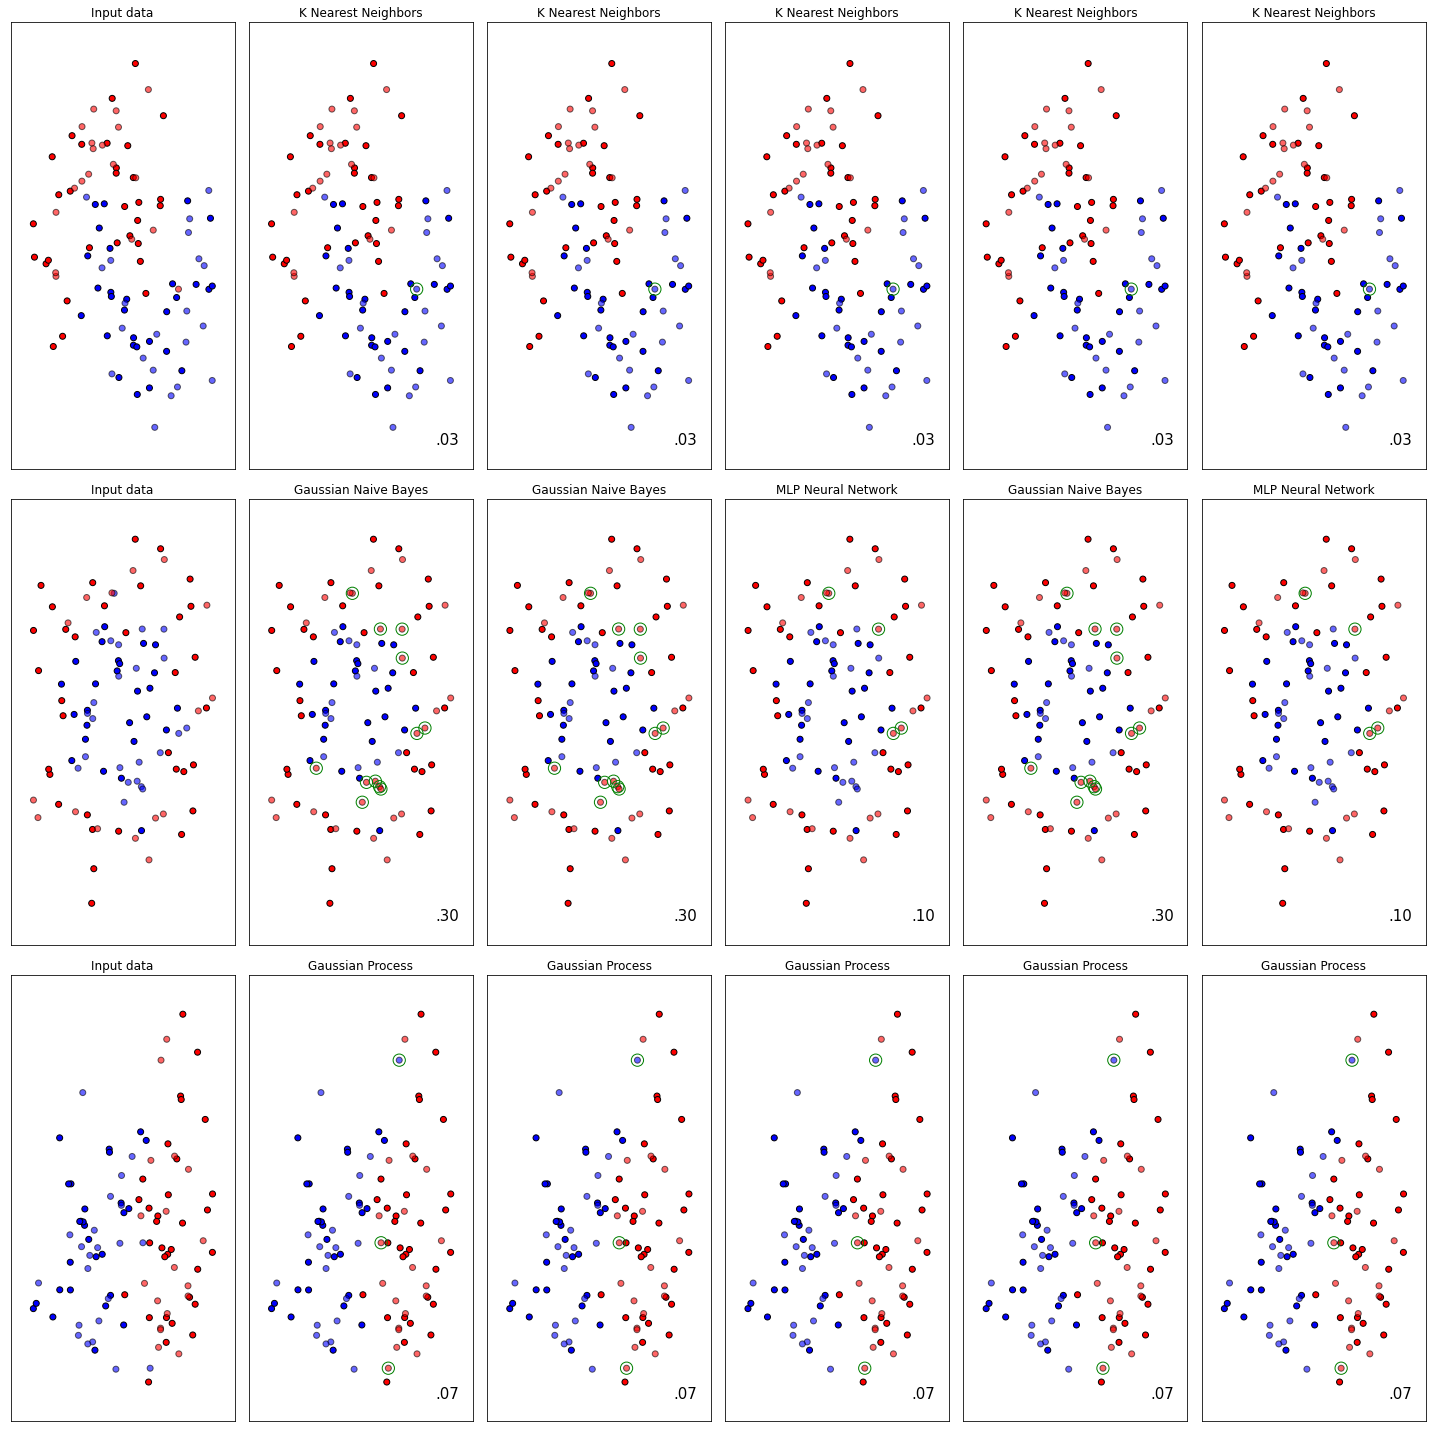

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# For these plots we perform our validation test

# Color Maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

figure = plt.figure(figsize=(20, 20))

i = 1
for j, ds in enumerate(datasets):
    # We will test the found top five best algorithms
    # We train the datasets in the same way done during genetic search
    # We test against the validation set
    top_n = 5
    training_set = pipedata()
    training_set.X = np.concatenate((ds.training_set.X, ds.testing_set.X), axis=0)
    training_set.y = np.concatenate((ds.training_set.y, ds.testing_set.y), axis=0)

    testing_set = validation_sets[j]
    
    # Create Mesh Grid
    h = 0.02
    
    X = np.concatenate((training_set.X, testing_set.X), axis=0)
    y = np.concatenate((training_set.y, testing_set.y), axis=0)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

    ax = plt.subplot(len(datasets), top_n+1, i)

    # Plot the training points and testing points (Input data)
    ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
               edgecolors='k')
    ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=testing_set.y, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

    # Format plot
    ax.set_title("Input data")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i+=1
    hof = hof_per_dataset[j]

    top_inds = hof[:top_n]
    print(top_inds)
    for ind in top_inds:
        # Initialize classifier
        print(ind)
        algo_name = ind[0]
        param_list = ind

        clf = Classifier.algorithmspace[algo_name](param_list)

        predictions = clf.evaluate(training_set, testing_set)

        score = ClassifierFitness().evaluate(predictions, testing_set.y)

        ax = plt.subplot(len(datasets), top_n+1, i)

        # Plot the training points and testing points (Input data)
        ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
                   edgecolors='k')
        # Plot predictions and fitness score
        ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')

        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

        # Highlight/circle errors
        errors = testing_set.X[predictions != testing_set.y]

        for mistake in errors:
            #err = testing_set.X[mistake,:]
            ax.scatter(mistake[0], mistake[1], marker='o', s=150, lw=1, color="green", facecolor="none")

        # Format plot
        ax.set_title(algo_name)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        print(i)
        i+=1

plt.tight_layout()

# Creating Trials
First, **preprocessing** of the provided dataset needs to occur prior to using the classifier pipeline.
We then split the dataset into a training and testing set. The **testing set** will be **stored**
away until the very end where it will be used to compare the best solutions found via Genetic Search.
Solutions will be compared in the form of **side-by-side plots**.
The **training set** will be **further split** into smaller trials that will be used to tune each generation
of algorithms during the Genetic Search algorithm.

In [2]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from see.base_classes import pipedata
from see.classifier_helpers import helpers
#import pandas as pd
import numpy as np

# Import/Create data: Sklearn tutorial toy datasets

## Moons
#X, y = make_moons(noise=0.3, random_state=0)

## Circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

## Linearly Seperable dataset
#X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                           random_state=1, n_clusters_per_class=1)
#rng = np.random.RandomState(2)
#X += 2 * rng.uniform(size=X.shape)

# Breast Cancer Data
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
#data = pd.read_csv(url, header=None)

#X = data.iloc[:,2:].to_numpy()

#def diagnosis_to_category(d):
#    if d == 'M':
#        return 0
#    elif d == 'B':
#        return 1
#    else:
#        print('WARNING: UNKNOWN Category')
#y = np.vectorize(diagnosis_to_category)(data[1].to_numpy())

In [3]:
# Preprocess data
X = StandardScaler().fit_transform(X)

# Split data into training and testing sets
dataset = helpers.generate_train_test_set(X, y)
validation_set = dataset.testing_set
data_set = helpers.generate_train_test_set(dataset.training_set.X, dataset.training_set.y)


# Split training data into trials
#trials = helpers.generate_tuning_trials(dataset.training_set.X, dataset.training_set.y)

In [4]:
# Example run of the default Classifier on the generated trials
individual = Classifier()
data = individual.runAlgo(dataset)
print(data)
print("The fitness score of the default classifier: ", ClassifierFitness().pipe(data).fitness)

<class 'see.classifiers.Classifier'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 200
	alpha = 0.0001
	max_depth = 1
	n_estimators = 100
	n_neighbors = 5

Time: 0.289 s
The fitness score of the default classifier:  0.1


## Genetic Search with Classifiers

In [5]:
from see import GeneticSearch

In [6]:
mydata = dataset
num_generations = 20
my_evolver = GeneticSearch.Evolver(workflow, mydata, pop_size=20, hof_size=num_generations)

In [7]:
%%time
# warnings may appear when this runs
population = my_evolver.run(ngen=num_generations)

Initializing a new random population
Generation 0/20 of population size 20
<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 59
	alpha = 0.51
	max_depth = 4
	n_estimators = 1
	n_neighbors = 1

RUNNING EVAL FOR KNN
Time: 0.007 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 100
	alpha = 0.42
	max_depth = 2
	n_estimators = 6
	n_neighbors = 7

Time: 0.001 s
fitness=0.325

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 14
	alpha = 0.758
	max_depth = 9
	n_estimators = 7
	n_neighbors = 8

RUNNING EVAL FOR GNB
Time: 0.001 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 19
	alpha = 0.086
	max_depth = 9
	n_estimators = 9
	n_neighbors = 8

Time: 0.018 s
fitness=0.325

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 49
	alpha = 0.59
	max_depth = 9
	n_estimators = 6
	n_ne

Time: 0.265 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 11
	alpha = 0.034
	max_depth = 2
	n_estimators = 5
	n_neighbors = 5

Time: 0.28 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 5
	alpha = 0.034
	max_depth = 2
	n_estimators = 6
	n_neighbors = 5

Time: 0.289 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 11
	alpha = 0.457
	max_depth = 3
	n_estimators = 5
	n_neighbors = 7

Time: 0.256 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 49
	alpha = 0.59
	max_depth = 9
	n_estimators = 6
	n_neighbors = 1

RUNNING EVAL FOR KNN
Time: 0.007 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 59
	alpha = 0.51
	max_depth = 4
	n_estimators = 1
	n_neighbors = 1

RUNNING EVAL FOR KNN
Time: 0.008 s
fitness=0.125

<c

Time: 0.266 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 27
	alpha = 0.104
	max_depth = 4
	n_estimators = 1
	n_neighbors = 1

Time: 0.004 s
fitness=0.275

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 33
	alpha = 0.675
	max_depth = 3
	n_estimators = 6
	n_neighbors = 1

Time: 0.362 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 52
	alpha = 0.421
	max_depth = 7
	n_estimators = 6
	n_neighbors = 8

Time: 0.002 s
fitness=0.225

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 52
	alpha = 0.571
	max_depth = 1
	n_estimators = 8
	n_neighbors = 1

Time: 0.236 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 83
	alpha = 0.767
	max_depth = 6
	n_estimators = 4
	n_neighbors = 5

Time: 0.285 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorith

Time: 0.276 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 33
	alpha = 0.675
	max_depth = 3
	n_estimators = 6
	n_neighbors = 1

Time: 0.258 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 33
	alpha = 0.571
	max_depth = 1
	n_estimators = 8
	n_neighbors = 1

Time: 0.239 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 52
	alpha = 0.675
	max_depth = 3
	n_estimators = 6
	n_neighbors = 1

Time: 0.245 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 59
	alpha = 0.248
	max_depth = 8
	n_estimators = 7
	n_neighbors = 1

Time: 0.013 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 55
	alpha = 0.991
	max_depth = 6
	n_estimators = 7
	n_neighbors = 9

Time: 0.276 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algor

Time: 0.249 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 60
	alpha = 0.979
	max_depth = 7
	n_estimators = 9
	n_neighbors = 9

Time: 0.016 s
fitness=0.2

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 47
	alpha = 0.281
	max_depth = 9
	n_estimators = 2
	n_neighbors = 4

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 88
	alpha = 0.091
	max_depth = 1
	n_estimators = 7
	n_neighbors = 9

Time: 0.286 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 13
	alpha = 0.841
	max_depth = 4
	n_estimators = 3
	n_neighbors = 2

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 36
	alpha = 0.404
	max_depth = 4
	n_estimators = 5
	n_neighbors = 7

Time: 0.001 s
fitness=0.275

<class 'se

Time: 0.252 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 33
	alpha = 0.571
	max_depth = 1
	n_estimators = 8
	n_neighbors = 1

Time: 0.303 s
fitness=0.1

#BEST [0.075,  ['K Nearest Neighbors', 1, 0.476, 5, 8, 3]]
Mutating Population
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflow mutate algorithm and looping over workflow
using workflo

Time: 0.292 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 77
	alpha = 0.211
	max_depth = 8
	n_estimators = 8
	n_neighbors = 8

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.15

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 57
	alpha = 0.701
	max_depth = 1
	n_estimators = 2
	n_neighbors = 5

Time: 0.216 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 21
	alpha = 0.651
	max_depth = 1
	n_estimators = 8
	n_neighbors = 3

Time: 0.014 s
fitness=0.45

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 27
	alpha = 0.248
	max_depth = 7
	n_estimators = 5
	n_neighbors = 2

Time: 0.001 s
fitness=0.225

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 72
	alpha = 0.328
	max_depth = 6
	n_estimators = 7
	n_neighbors = 3

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.3

<class 

Time: 0.251 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 73
	alpha = 0.133
	max_depth = 2
	n_estimators = 6
	n_neighbors = 9

Time: 0.012 s
fitness=0.225

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 38
	alpha = 0.094
	max_depth = 8
	n_estimators = 9
	n_neighbors = 5

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 2
	alpha = 0.308
	max_depth = 2
	n_estimators = 4
	n_neighbors = 4

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 44
	alpha = 0.556
	max_depth = 2
	n_estimators = 3
	n_neighbors = 8

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 97
	alpha = 0.866
	max_depth = 8
	n_estimators = 9
	n_neighbors = 3

Time: 0.254

Time: 0.278 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 53
	alpha = 0.554
	max_depth = 4
	n_estimators = 8
	n_neighbors = 9

RUNNING EVAL FOR GNB
Time: 0.002 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 1
	alpha = 0.797
	max_depth = 8
	n_estimators = 1
	n_neighbors = 3

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.075

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 52
	alpha = 0.063
	max_depth = 9
	n_estimators = 8
	n_neighbors = 3

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.075

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 52
	alpha = 0.063
	max_depth = 9
	n_estimators = 8
	n_neighbors = 3

RUNNING EVAL FOR KNN
Time: 0.005 s
fitness=0.075

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 1
	alpha = 0.797
	max_depth = 8
	n_estimators = 1

Time: 0.235 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 21
	alpha = 0.656
	max_depth = 7
	n_estimators = 7
	n_neighbors = 1

Time: 0.013 s
fitness=0.25

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 71
	alpha = 0.612
	max_depth = 4
	n_estimators = 4
	n_neighbors = 1

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Gaussian Naive Bayes
	max_iter = 13
	alpha = 0.553
	max_depth = 7
	n_estimators = 9
	n_neighbors = 9

RUNNING EVAL FOR GNB
Time: 0.003 s
fitness=0.3

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 73
	alpha = 0.894
	max_depth = 9
	n_estimators = 3
	n_neighbors = 6

Time: 0.225 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 24
	alpha = 0.962
	max_depth = 4
	n_estimators = 6
	n_neighbors = 4

Time: 0.002 s
fitness=0.275

<class 's

Time: 0.251 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 42
	alpha = 0.149
	max_depth = 2
	n_estimators = 2
	n_neighbors = 1

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.125

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Random Forest
	max_iter = 27
	alpha = 0.128
	max_depth = 5
	n_estimators = 9
	n_neighbors = 6

Time: 0.016 s
fitness=0.175

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 1
	alpha = 0.797
	max_depth = 8
	n_estimators = 1
	n_neighbors = 3

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.075

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 52
	alpha = 0.063
	max_depth = 9
	n_estimators = 8
	n_neighbors = 3

RUNNING EVAL FOR KNN
Time: 0.009 s
fitness=0.075

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 1
	alpha = 0.063
	max_depth = 9
	n_estimators = 8
	n_neighbors = 3

RUNNING

Time: 0.222 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = MLP Neural Network
	max_iter = 15
	alpha = 0.076
	max_depth = 7
	n_estimators = 9
	n_neighbors = 8

Time: 0.228 s
fitness=0.1

<class 'see.Workflow.workflow'> parameters: 
	algorithm = Decision Tree
	max_iter = 21
	alpha = 0.864
	max_depth = 4
	n_estimators = 2
	n_neighbors = 5

Time: 0.002 s
fitness=0.275

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 1
	alpha = 0.797
	max_depth = 8
	n_estimators = 1
	n_neighbors = 3

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.075

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 52
	alpha = 0.063
	max_depth = 9
	n_estimators = 8
	n_neighbors = 3

RUNNING EVAL FOR KNN
Time: 0.004 s
fitness=0.075

<class 'see.Workflow.workflow'> parameters: 
	algorithm = K Nearest Neighbors
	max_iter = 52
	alpha = 0.797
	max_depth = 9
	n_estimators = 1
	n_neighbors = 3

RUNNING EVAL FOR KNN
Time: 0.0

In [8]:
%%time
print(my_evolver.hof[0].fitness.values[0]) # The best solution in each generation
print(my_evolver.best_avgs) # The fitness score of the best of each generation

0.075
[0.24125000000000002, 0.18250000000000002, 0.13250000000000003, 0.15625000000000006, 0.13875000000000004, 0.16250000000000003, 0.14375000000000007, 0.1387500000000001, 0.1350000000000001, 0.1587500000000001, 0.16250000000000012, 0.14500000000000007, 0.14000000000000007, 0.1475000000000001, 0.11125000000000003, 0.1637500000000001, 0.13375000000000006, 0.14625000000000007, 0.1350000000000001, 0.13750000000000012, 0.1487500000000001]
CPU times: user 698 µs, sys: 9 µs, total: 707 µs
Wall time: 535 µs


## Final Comparison
We compare the found solutions using the testing set that was set aside at the very beginning.
We also train the classifiers using the training set that was made at the very beginning.

*TODO*: I'm not sure if it is correct to retrain the classifiers using the entire training
set. There might be issues with overfitting...

*TODO*: The plots below work nicely because we have two dimension data. Think about what to
do when the feature space is multidimensional.

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN


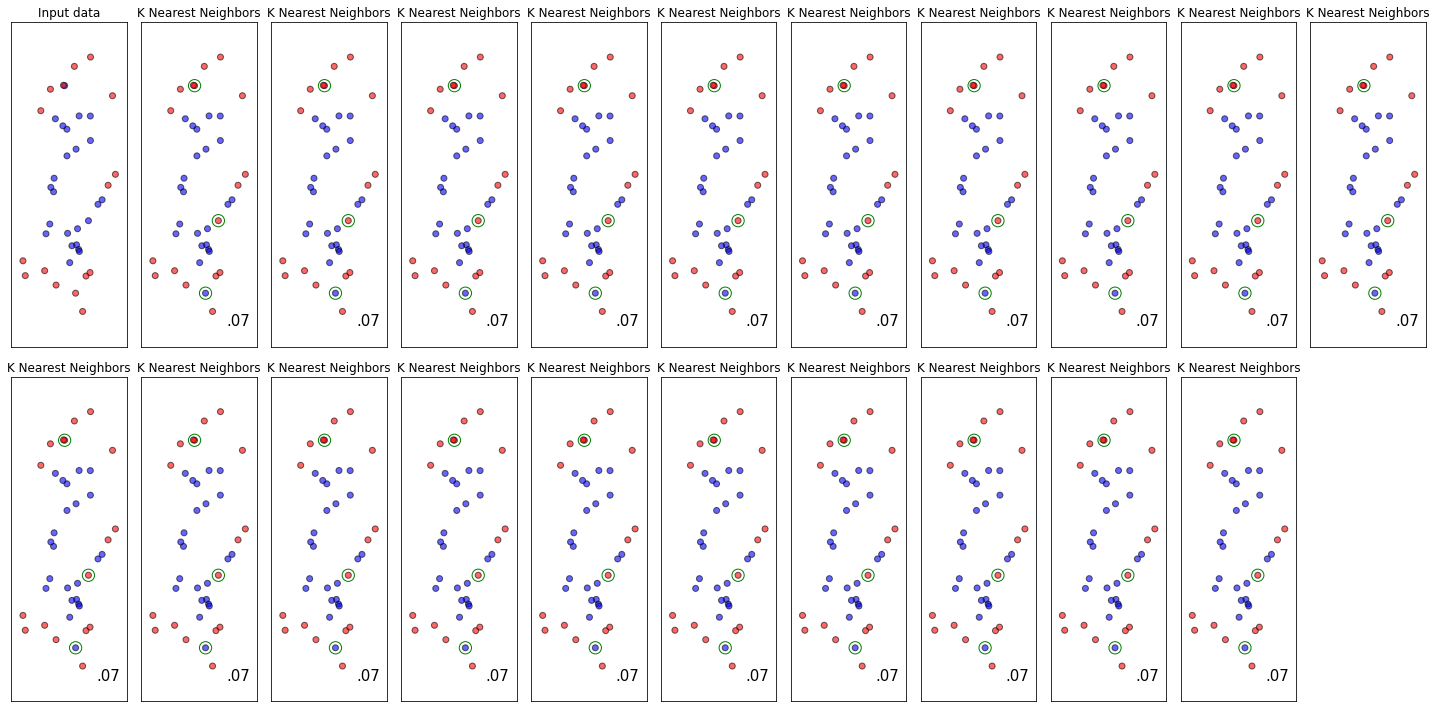

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

solution_set = my_evolver.hof

# Use stored away testing set and the entire training set for final comparisons
training_set = dataset.training_set
testing_set = validation_set

# TODO: Algorithms may be non-deterministic so fitness scores may change
# on different plot iterations...?

# Color Maps
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Create Mesh Grid
h = 0.02
x_min, x_max = testing_set.X[:, 0].min() - .5, testing_set.X[:, 0].max() + .5
y_min, y_max = testing_set.X[:, 1].min() - .5, testing_set.X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                  np.arange(y_min, y_max, h))

figure = plt.figure(figsize=(20, 10))

ax = plt.subplot(2,round(len(solution_set)/2) + 1,1)

# Plot the training points and testing points (Input data)
#ax.scatter(training_set.X[:, 0], training_set.X[:, 1], c=training_set.y, cmap=cm_bright,
#           edgecolors='k')
ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=testing_set.y, cmap=cm_bright, alpha=0.6,
           edgecolors='k')

# Format plot
ax.set_title("Input data")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

for i, ind in enumerate(solution_set):
    # Initialize classifier
    algo_name = ind[0]
    param_list = ind
    clf = Classifier.algorithmspace[algo_name](param_list)
    
    predictions = clf.evaluate(training_set, testing_set)

    ax = plt.subplot(2, round(len(solution_set)/2) + 1,i + 2)

    # Plot predictions and fitness score
    ax.scatter(testing_set.X[:, 0], testing_set.X[:, 1], c=predictions, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    score = ClassifierFitness().evaluate(predictions, testing_set.y)
    
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

    # Draw Contour/Color Plot
    # TODO: We have to retrain the data set because we
    # we do not store the classifier created in clf#evaluate
    # anywhere. Consider storing it as an attribute.

    #contour_set = pipedata()
    #contour_set.X = np.c_[xx.ravel(), yy.ravel()]
    #Z = clf.evaluate(training_set, contour_set)
    #Z = Z.reshape(xx.shape)
    
    #ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
    
    # Highlight/circle errors
    errors = testing_set.X[predictions != testing_set.y]
    for mistake in errors:
        #err = testing_set.X[mistake,:]
        ax.scatter(mistake[0], mistake[1], marker='o', s=150, lw=1, color="green", facecolor="none")

    # Format plot
    ax.set_title(algo_name)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

plt.tight_layout()

In [10]:
my_evolver.hof[0]
print(my_evolver.hof)

[['K Nearest Neighbors', 1, 0.797, 8, 1, 3], ['K Nearest Neighbors', 52, 0.063, 9, 8, 3], ['K Nearest Neighbors', 1, 0.476, 5, 7, 3], ['K Nearest Neighbors', 1, 0.063, 5, 8, 3], ['K Nearest Neighbors', 52, 0.476, 9, 7, 3], ['K Nearest Neighbors', 1, 0.797, 8, 2, 3], ['K Nearest Neighbors', 95, 0.023, 6, 1, 3], ['K Nearest Neighbors', 1, 0.476, 9, 8, 3], ['K Nearest Neighbors', 52, 0.063, 5, 7, 3], ['K Nearest Neighbors', 52, 0.063, 9, 7, 3], ['K Nearest Neighbors', 1, 0.476, 5, 8, 3], ['K Nearest Neighbors', 68, 0.023, 6, 2, 3], ['K Nearest Neighbors', 55, 0.023, 6, 7, 3], ['K Nearest Neighbors', 1, 0.476, 8, 1, 3], ['K Nearest Neighbors', 55, 0.476, 6, 7, 3], ['K Nearest Neighbors', 1, 0.023, 8, 1, 3], ['K Nearest Neighbors', 95, 0.797, 6, 2, 3], ['K Nearest Neighbors', 95, 0.797, 8, 1, 3], ['K Nearest Neighbors', 1, 0.023, 6, 2, 3], ['K Nearest Neighbors', 68, 0.476, 5, 8, 3]]


In [11]:
list(map(lambda ind: ind.fitness.values[0], my_evolver.hof))

[0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075,
 0.075]

# Comparing Genetic Search and Validation test (incomplete)
and incorrect...

RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN
RUNNING EVAL FOR KNN


([<matplotlib.axis.XTick at 0x7f7abf8d3460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

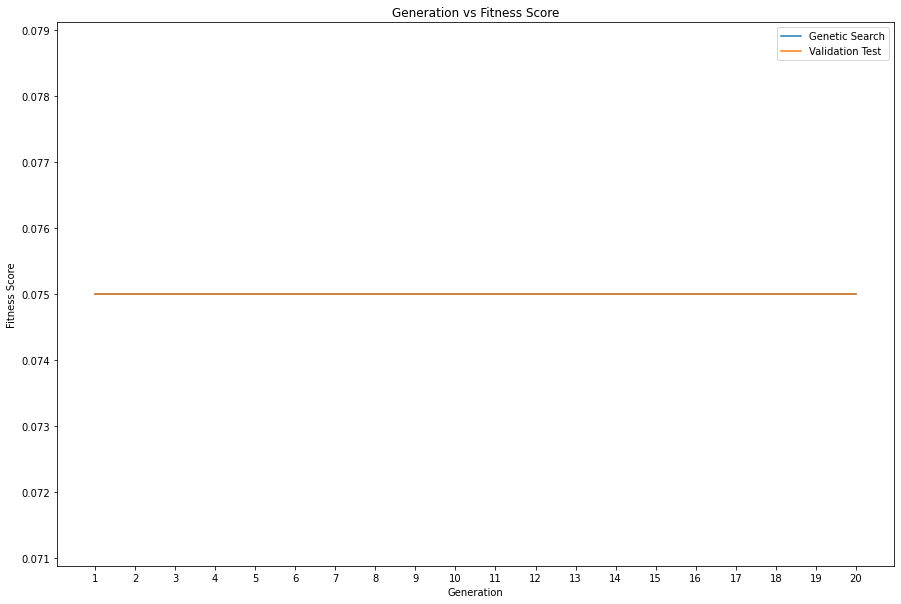

In [12]:
import matplotlib.pyplot as plt

## TODO IMPORTANT READ FIRST: When making this cell, I had thought that hall of fame meant the best of
# each generation. I now believe that the hall of fame is the best individuals throughout
# the entire run of genetic search. This being the case, I need to modify the source code
# to track the generational best in order properly make this plot. 
# Tldr. I believe that the plot below is incorrect.


# The following plot shows:
# 1) The fitness scores of the best individual of each generation during Genetic Search
# 2) The fitness scores of the best individual of each generation when tested on the unseen testing set

solution_set = my_evolver.hof

x = range(1, num_generations + 1)
#x = range(num_generations, 0, -1)

# Extract fitness scores during Genetic Search
y_1 = list(map(lambda ind: ind.fitness.values[0], solution_set))
y_1.reverse()

def score_clf(algo_vector, testing_set):
    algo_name = algo_vector[0]
    param_list = algo_vector
    targets = testing_set.y
    clf = Classifier.algorithmspace[algo_name](param_list)
    predictions = clf.evaluate(training_set, testing_set)
    return ClassifierFitness().evaluate(predictions, targets)
    
y_2 = list(map(lambda ind: score_clf(ind, testing_set), solution_set))
y_2.reverse()

figure = plt.figure(figsize=(15, 10))
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.legend(['Genetic Search', 'Validation Test'])
plt.title('Generation vs Fitness Score')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.xticks(x)